# Imports

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib as mpt
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, explained_variance_score
import math
import numpy as np
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import statsmodels.api as sm
from sklearn import preprocessing
from sklearn import utils

# Preliminary Analysis

In [2]:
df = pd.read_csv('insurance.csv')

In [3]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
Q1 = np.quantile(df.charges, 0.25)
Q3 = np.quantile(df.charges, 0.75)
Med = np.median(df.charges)
print(f'Q1 = {Q1}, Median = {Med}, Q3 = {Q3}')

Q1 = 4740.28715, Median = 9382.033, Q3 = 16639.912515


In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
display(df['children'].value_counts())
display(df['sex'].value_counts())
display(df['smoker'].value_counts())
display(df['region'].value_counts())

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

male      676
female    662
Name: sex, dtype: int64

no     1064
yes     274
Name: smoker, dtype: int64

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

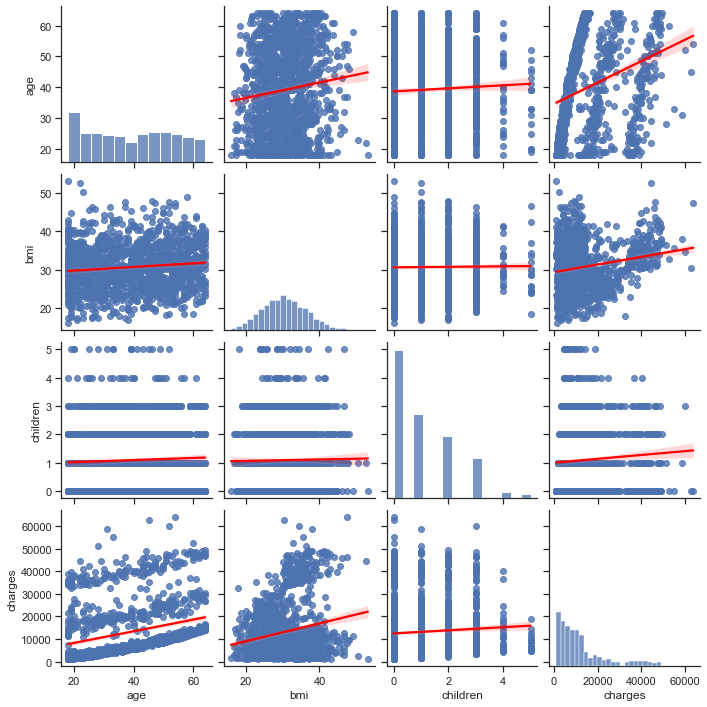

In [7]:
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(df, kind="reg", plot_kws={'line_kws':{'color':'red'}})
plt.show()

In [8]:
corr = df.corr()
corr.style.background_gradient(cmap ='coolwarm')

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


In [9]:
groupbySex = df.groupby(['sex'])
groupbySex.mean().style.background_gradient(cmap ='coolwarm')

,age,bmi,children,charges
sex,,,,
female,39.503021,30.377749,1.074018,12569.578844
male,38.917160,30.943129,1.115385,13956.751178


In [10]:
groupbySmoke = df.groupby(['smoker'])
groupbySmoke.mean().style.background_gradient(cmap ='coolwarm')

,age,bmi,children,charges
smoker,,,,
no,39.385338,30.651795,1.090226,8434.268298
yes,38.514599,30.708449,1.113139,32050.231832


In [11]:
groupbyRegion = df.groupby(['region'])
groupbyRegion.mean().style.background_gradient(cmap ='coolwarm')

,age,bmi,children,charges
region,,,,
northeast,39.268519,29.173503,1.046296,13406.384516
northwest,39.196923,29.199785,1.147692,12417.575374
southeast,38.939560,33.355989,1.049451,14735.411438
southwest,39.455385,30.596615,1.141538,12346.937377


In [12]:
dataset = df[['age', 'children', 'bmi', 'charges']]

In [13]:
dataset

,age,children,bmi,charges
0,19,0,27.900,16884.92400
1,18,1,33.770,1725.55230
2,28,3,33.000,4449.46200
3,33,0,22.705,21984.47061
4,32,0,28.880,3866.85520
...,...,...,...,...
1333,50,3,30.970,10600.54830
1334,18,0,31.920,2205.98080
1335,18,0,36.850,1629.83350
1336,21,0,25.800,2007.94500


# Changing categorical variables into numerical variables

In [14]:
# Splitting up the charges variable into low, low-mid, mid-high, and high.
temp = []
for value in df.charges:
    if(value < Q1):
        temp.append('Low')
    elif(value >= Q1) and (value < Med):
        temp.append('Low-Med')
    elif(value >= Med) and (value < Q3):
        temp.append('Mid-High')
    else:
        temp.append('High')
        
dataset['bill'] = temp
df['bill'] = temp

C:\Users\kalpe\AppData\Local\Temp\ipykernel_22996\462602444.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['bill'] = temp


In [15]:
# Changing sex to numerical variable
# 1 = Male
# 2 = Female

gender = []
for value in df.sex:
    if(value == 'male'):
        gender.append(1)
    else:
        gender.append(0)
        
dataset['gender'] = gender

dataset

C:\Users\kalpe\AppData\Local\Temp\ipykernel_22996\2928124433.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['gender'] = gender


,age,children,bmi,charges,bill,gender
0,19,0,27.900,16884.92400,High,0
1,18,1,33.770,1725.55230,Low,1
2,28,3,33.000,4449.46200,Low,1
3,33,0,22.705,21984.47061,High,1
4,32,0,28.880,3866.85520,Low,1
...,...,...,...,...,...,...
1333,50,3,30.970,10600.54830,Mid-High,1
1334,18,0,31.920,2205.98080,Low,0
1335,18,0,36.850,1629.83350,Low,0
1336,21,0,25.800,2007.94500,Low,0


In [16]:
# Converting regions to numerical variables
# 1 = Northeast
# 2 = Northwest
# 3 = Southeast
# 4 = Southwest

region = []
for value in df.region:
    if(value == 'northeast'):
        region.append(1)
    elif(value == 'northwest'):
        region.append(2)
    elif(value == 'southeast'):
        region.append(3)
    else:
        region.append(4)

dataset['region'] = region


# Converting Smoker into numerical variable
smoker = []
for value in df.smoker:
    if(value == 'yes'):
        smoker.append(1)
    else:
        smoker.append(0)
        
dataset['smoker'] = smoker



dataset

C:\Users\kalpe\AppData\Local\Temp\ipykernel_22996\439628704.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['region'] = region


,age,children,bmi,charges,bill,gender,region,smoker
0,19,0,27.900,16884.92400,High,0,4,1
1,18,1,33.770,1725.55230,Low,1,3,0
2,28,3,33.000,4449.46200,Low,1,3,0
3,33,0,22.705,21984.47061,High,1,2,0
4,32,0,28.880,3866.85520,Low,1,2,0
...,...,...,...,...,...,...,...,...
1333,50,3,30.970,10600.54830,Mid-High,1,2,0
1334,18,0,31.920,2205.98080,Low,0,1,0
1335,18,0,36.850,1629.83350,Low,0,3,0
1336,21,0,25.800,2007.94500,Low,0,4,0


In [17]:
health = []
for values in df.bmi:
    if values < 18.5: 
        health.append("underweight")
    elif 18.5 >= values <= 24.9:  
        health.append("normal weight")
    elif 25 >= values <= 29.9:
        health.append("overweight")
    else:
        health.append("obesity")
        
df['health'] = health

In [18]:
df

,age,sex,bmi,children,smoker,region,charges,bill,health
0,19,female,27.900,0,yes,southwest,16884.92400,High,obesity
1,18,male,33.770,1,no,southeast,1725.55230,Low,obesity
2,28,male,33.000,3,no,southeast,4449.46200,Low,obesity
3,33,male,22.705,0,no,northwest,21984.47061,High,overweight
4,32,male,28.880,0,no,northwest,3866.85520,Low,obesity
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,Mid-High,obesity
1334,18,female,31.920,0,no,northeast,2205.98080,Low,obesity
1335,18,female,36.850,0,no,southeast,1629.83350,Low,obesity
1336,21,female,25.800,0,no,southwest,2007.94500,Low,obesity


In [19]:
# bill should be the only varible that is an object
dataset.dtypes

age           int64
children      int64
bmi         float64
charges     float64
bill         object
gender        int64
region        int64
smoker        int64
dtype: object

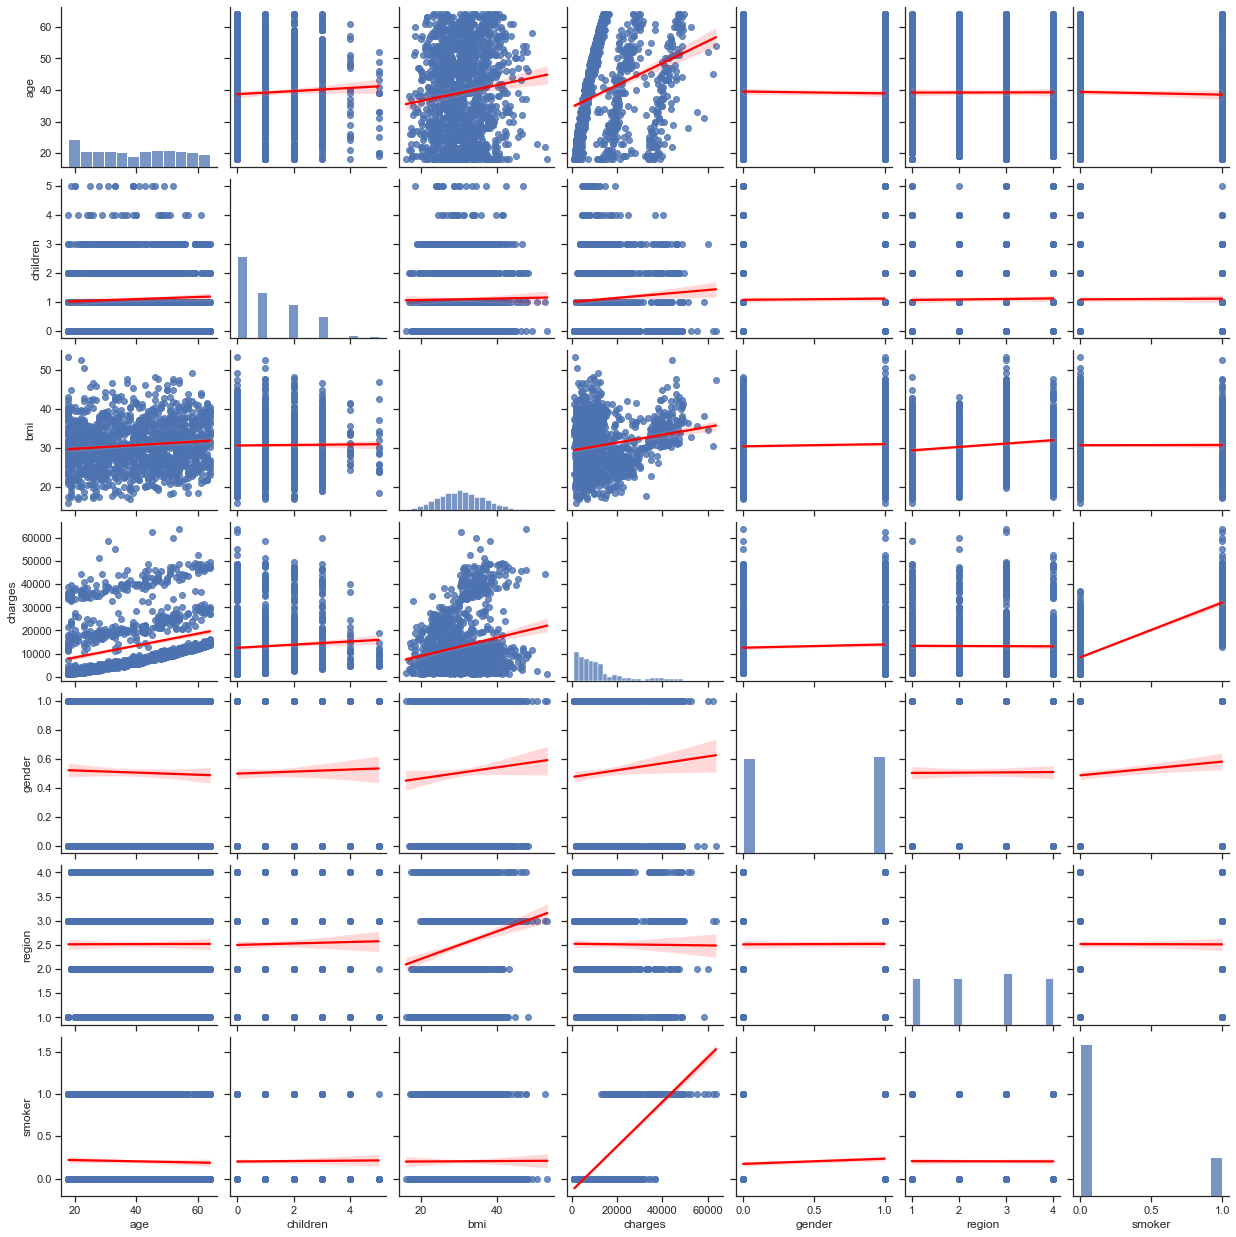

In [20]:
sns.set(style="ticks", color_codes=True)
gg = sns.pairplot(dataset, kind="reg", plot_kws={'line_kws':{'color':'red'}})
plt.show()

In [21]:
corr2 = dataset.corr()
corr2.style.background_gradient(cmap ='coolwarm')

,age,children,bmi,charges,gender,region,smoker
age,1.000000,0.042469,0.109272,0.299008,-0.020856,0.002127,-0.025019
children,0.042469,1.000000,0.012759,0.067998,0.017163,0.016569,0.007673
bmi,0.109272,0.012759,1.000000,0.198341,0.046371,0.157566,0.003750
charges,0.299008,0.067998,0.198341,1.000000,0.057292,-0.006208,0.787251
gender,-0.020856,0.017163,0.046371,0.057292,1.000000,0.004588,0.076185
region,0.002127,0.016569,0.157566,-0.006208,0.004588,1.000000,-0.002181
smoker,-0.025019,0.007673,0.003750,0.787251,0.076185,-0.002181,1.000000


# Data Visualization

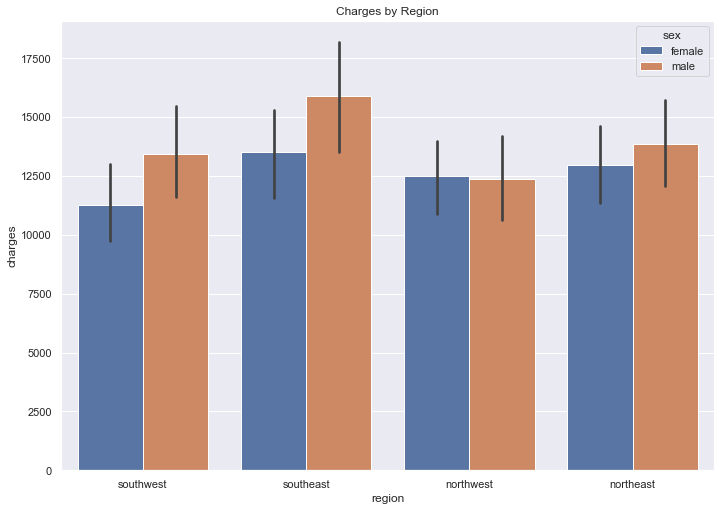

In [22]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x=df['region'], y=dataset['charges'], hue=df['sex'])
plt.title("Charges by Region")
plt.show()

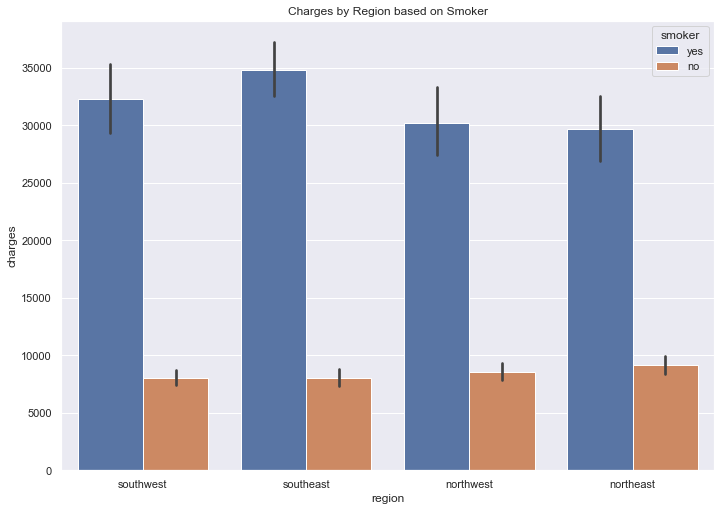

In [65]:
sns.barplot(x=df['region'], y=df['charges'], hue=df['smoker'])
plt.title("Charges by Region based on Smoker")
plt.show()

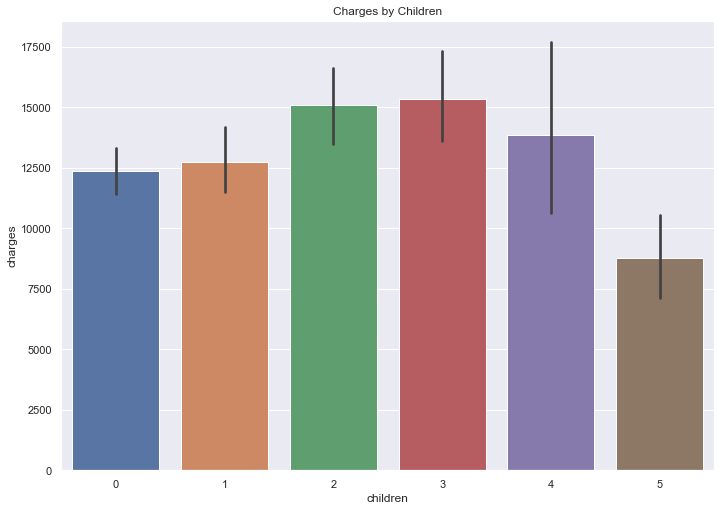

In [24]:
sns.barplot(x=df['children'], y=df['charges'])
plt.title("Charges by Children")
plt.show()

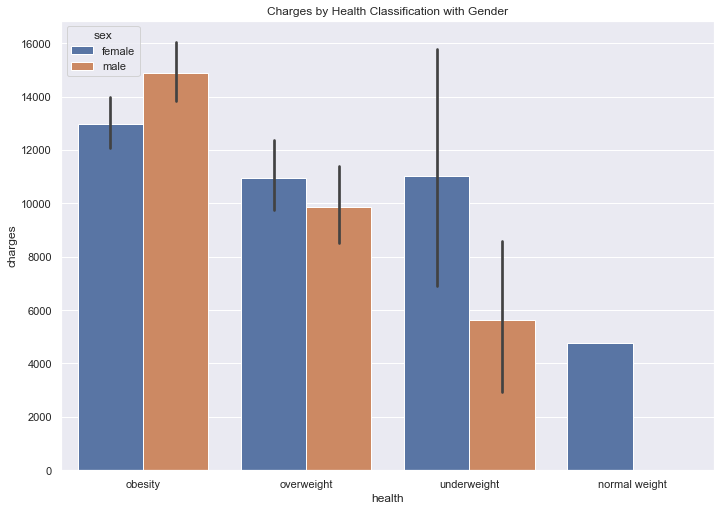

In [25]:
sns.barplot(x=df['health'], y=df['charges'], hue=df['sex'])
plt.title("Charges by Health Classification with Gender")
plt.show()

# DecisionTreeClassifier()

In [26]:
# Running the training WITHOUT new created columns
x = df[['age', 'bmi', 'children']]
y = df['bill']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

cart = DecisionTreeClassifier()
cart.fit(x_train, y_train)

DecisionTreeClassifier()

In [27]:
train_pred = cart.predict(x_train)
print("Accuracy:",metrics.accuracy_score(y_train, train_pred))
print("confusion_matrix")
print(confusion_matrix(y_train, train_pred))

Accuracy: 0.9953271028037384
confusion_matrix
[[267   0   0   0]
 [  3 264   0   0]
 [  0   1 263   0]
 [  0   1   0 271]]


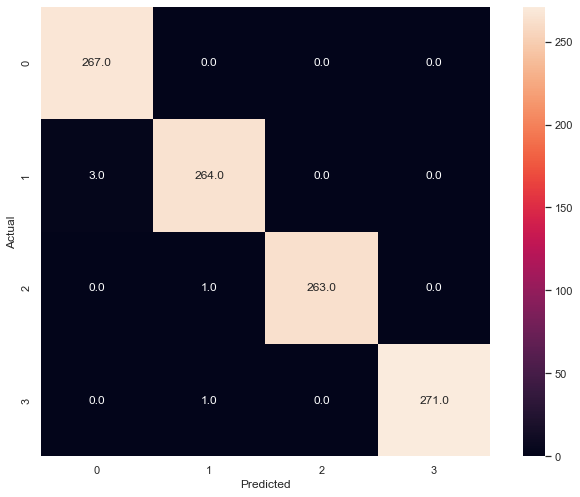

In [28]:
conf= confusion_matrix(y_train, train_pred)
sns.heatmap(conf, annot=True, fmt=".1f", square = True);
plt.ylabel('Actual');
plt.xlabel('Predicted');

In [29]:
test_pred = cart.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, test_pred))
print("confusion_matrix")
print(confusion_matrix(y_test, test_pred))

Accuracy: 0.5597014925373134
confusion_matrix
[[17 12 14 25]
 [21 41  2  4]
 [18  3 45  4]
 [10  3  2 47]]


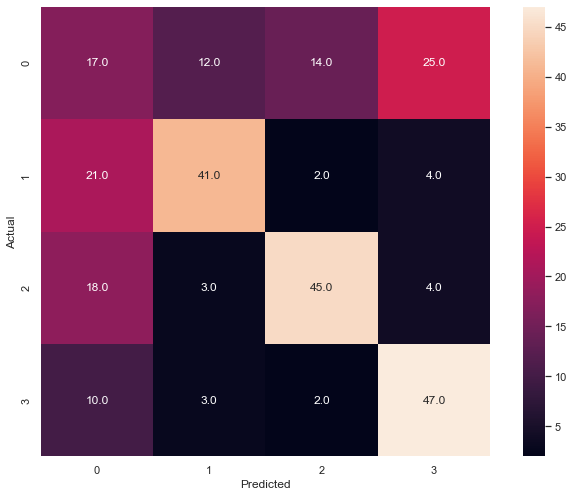

In [30]:
conf= confusion_matrix(y_test, test_pred)
sns.heatmap(conf, annot=True, fmt=".1f", square = True);
plt.ylabel('Actual');
plt.xlabel('Predicted');

In [31]:
# Running the training wih new created columns!
x2 = dataset[['age', 'children', 'bmi', 'gender', 'region', 'smoker']]
y2 = dataset['bill']

x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.2, random_state=0)

cart2 = DecisionTreeClassifier()
cart2.fit(x2_train, y2_train)

DecisionTreeClassifier()

In [32]:
train_pred2 = cart2.predict(x2_train)
print("Accuracy:",metrics.accuracy_score(y2_train, train_pred2))
print("confusion_matrix")
print(confusion_matrix(y2_train, train_pred2))

Accuracy: 0.9981308411214953
confusion_matrix
[[267   0   0   0]
 [  1 266   0   0]
 [  0   0 264   0]
 [  0   1   0 271]]


In [33]:
test_pred2 = cart2.predict(x2_test)
print("Accuracy:",metrics.accuracy_score(y2_test, test_pred2))
print("confusion_matrix")
print(confusion_matrix(y2_test, test_pred2))

Accuracy: 0.8283582089552238
confusion_matrix
[[54  4  1  9]
 [ 9 57  0  2]
 [ 5  3 59  3]
 [ 4  2  4 52]]


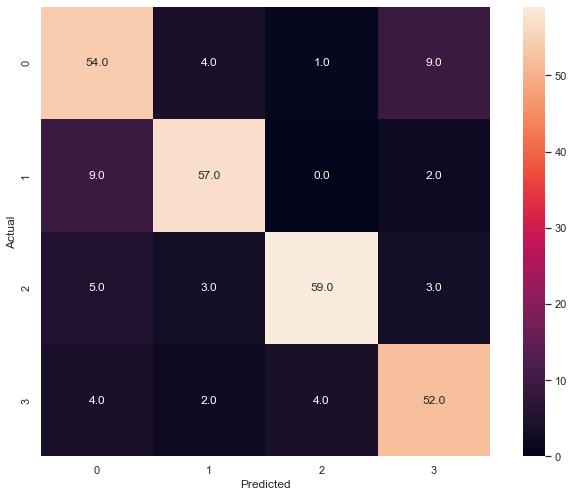

In [34]:
conf= confusion_matrix(y2_test, test_pred2)
sns.heatmap(conf, annot=True, fmt=".1f", square = True);
plt.ylabel('Actual');
plt.xlabel('Predicted');

# Feature Selection 

In [35]:
lab_enc = preprocessing.LabelEncoder()
y2_encoded = lab_enc.fit_transform(y2)

In [36]:
X = sm.add_constant(x2)
model1 = sm.OLS(y2_encoded, X).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.516
Method:                 Least Squares   F-statistic:                     238.7
Date:                Thu, 08 Dec 2022   Prob (F-statistic):          4.49e-207
Time:                        10:17:57   Log-Likelihood:                -1559.1
No. Observations:                1338   AIC:                             3132.
Df Residuals:                    1331   BIC:                             3169.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7885      0.126      6.248      0.000       0.541       1.036
age            0.0331      0.002     21.708      0.000       0.030       0.036
children       0.0344      0.018      1.949      0.052      -0.000       0.069
bmi           -0.0082      0.004     -2.295      0.022      -0.015      -0.001
gender        -0.0680      0.043     -1.592      0.112      -0.152       0.016
region        -0.0065      0.020     -0.336      0.737      -0.045       0.032
smoker        -1.5879      0.053    -30.031      0.000      -1.692      -1.484
==============================================================================
Omnibus:                      156.960   Durbin-Watson:                   2.102
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1333.076
Skew:                           0.156   Prob(JB):                    3.36e-290
Kurtosis:                       7.880   Cond. No.                         305.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
x3 = dataset[['age', 'bmi', 'children', 'gender', 'smoker']]
X1 = sm.add_constant(x3)
model2 = sm.OLS(y2_encoded, X1).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.516
Method:                 Least Squares   F-statistic:                     286.6
Date:                Thu, 08 Dec 2022   Prob (F-statistic):          2.67e-208
Time:                        10:17:58   Log-Likelihood:                -1559.2
No. Observations:                1338   AIC:                             3130.
Df Residuals:                    1332   BIC:                             3162.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7776      0.122      6.380      0.000       0.538       1.017
age            0.0331      0.002     21.723      0.000       0.030       0.036
bmi           -0.0084      0.004     -2.379      0.017      -0.015      -0.001
children       0.0344      0.018      1.945      0.052      -0.000       0.069
gender        -0.0680      0.043     -1.591      0.112      -0.152       0.016
smoker        -1.5878      0.053    -30.040      0.000      -1.692      -1.484
==============================================================================
Omnibus:                      157.395   Durbin-Watson:                   2.103
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1337.191
Skew:                           0.160   Prob(JB):                    4.29e-291
Kurtosis:                       7.887   Cond. No.                         295.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
x4 = dataset[['age', 'bmi', 'children', 'smoker']]
X2 = sm.add_constant(x4)
model3 = sm.OLS(y2_encoded, X2).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.517
Model:                            OLS   Adj. R-squared:                  0.516
Method:                 Least Squares   F-statistic:                     357.2
Date:                Thu, 08 Dec 2022   Prob (F-statistic):          4.69e-209
Time:                        10:17:59   Log-Likelihood:                -1560.5
No. Observations:                1338   AIC:                             3131.
Df Residuals:                    1333   BIC:                             3157.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7510      0.121      6.217      0.000       0.514       0.988
age            0.0332      0.002     21.757      0.000       0.030       0.036
bmi           -0.0086      0.004     -2.458      0.014      -0.016      -0.002
children       0.0339      0.018      1.917      0.055      -0.001       0.069
smoker        -1.5942      0.053    -30.229      0.000      -1.698      -1.491
==============================================================================
Omnibus:                      157.454   Durbin-Watson:                   2.102
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1329.185
Skew:                           0.166   Prob(JB):                    2.35e-289
Kurtosis:                       7.872   Cond. No.                         292.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
x3_train, x3_test, y3_train, y3_test = train_test_split(x4, y2_encoded, test_size=0.2, random_state=0)

cart3 = DecisionTreeClassifier()
cart3.fit(x3_train, y3_train)

DecisionTreeClassifier()

In [40]:
test_pred3 = cart3.predict(x3_test)
print("Accuracy:",metrics.accuracy_score(y3_test, test_pred3))
print("confusion_matrix")
print(confusion_matrix(y3_test, test_pred3))

Accuracy: 0.7761194029850746
confusion_matrix
[[54  4  0 10]
 [ 8 54  3  3]
 [ 7  5 51  7]
 [ 7  2  4 49]]


Feature Selection DID NOT help.

# Predicing Medical Costs

In [41]:
dataset

,age,children,bmi,charges,bill,gender,region,smoker
0,19,0,27.900,16884.92400,High,0,4,1
1,18,1,33.770,1725.55230,Low,1,3,0
2,28,3,33.000,4449.46200,Low,1,3,0
3,33,0,22.705,21984.47061,High,1,2,0
4,32,0,28.880,3866.85520,Low,1,2,0
...,...,...,...,...,...,...,...,...
1333,50,3,30.970,10600.54830,Mid-High,1,2,0
1334,18,0,31.920,2205.98080,Low,0,1,0
1335,18,0,36.850,1629.83350,Low,0,3,0
1336,21,0,25.800,2007.94500,Low,0,4,0


In [55]:
def prices(price):
    if(price == ['High']):
        return f'$16,640 or more!'
    elif(price == ['Mid-High']):
        return f'$9,282 to $16,639!'
    elif(price == ['Low-Mid']):
        return f'$4,740 to $9,382!'
    else:
        return f'below $4,740!'

In [56]:
print('this tool will predict the medical cost, with the provided inputs\n')

this tool will predict the medical cost, with the provided inputs



In [57]:
age_input = int(input('Please input the age: '))
children_input = int(input('Please input the number of children: '))
bmi_input = float(input('Please input in the BMI: '))
gender_input = int(input('Please input 1 for male, or 2 for female: '))
region_input = int(input('Please input 1 for northeast, 2 for northwest, 3 for southeast, or 4 for southwest: '))
smoker_input = int(input('Please input 1 for smoker, or 0 for non-smoker: '))

predicted = cart2.predict([[age_input, children_input, bmi_input, gender_input, region_input, smoker_input]])

print(f'\nThis is the predicted medical cost for your patient: {prices(predicted)}, cost range is: {predicted} ')

Please input the age: 10
Please input the number of children: 10
Please input in the BMI: 10
Please input 1 for male, or 2 for female: 1
Please input 1 for northeast, 2 for northwest, 3 for southeast, or 4 for southwest: 1
Please input 1 for smoker, or 0 for non-smoker: 1

This is the predicted medical cost for your patient: $9,282 to $16,639!, cost range is: ['Mid-High'] 


C:\Users\kalpe\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
